In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert2/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert2/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert2/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,5
1,0
2,3
3,5
4,4
...,...
1855,4
1856,2
1857,5
1858,4


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.034799,0.007419,0.000058,0.858459,0.002880,0.096384,1.665610e-04,5.431420e-03,0.041148,8.965418e-01,4.679534e-05,5.666518e-02
1,0.001396,0.987387,0.003262,0.006616,0.001280,0.000060,4.774572e-06,9.803371e-01,0.019658,5.996743e-11,2.847254e-11,1.353408e-08
2,0.000005,0.000034,0.000028,0.001152,0.996537,0.002243,2.486059e-14,2.598589e-13,0.000007,2.992682e-09,9.999925e-01,2.115939e-11
3,0.001346,0.986554,0.002334,0.009568,0.000139,0.000058,6.141969e-12,9.648619e-01,0.035138,1.644592e-11,5.408900e-11,1.192824e-10
4,0.000085,0.000078,0.000104,0.014233,0.002473,0.983027,8.504499e-05,3.332345e-03,0.043735,1.132070e-02,3.294081e-02,9.085861e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.000170,0.002066,0.000020,0.972698,0.003607,0.021439,2.973849e-08,4.344618e-10,0.000495,8.445364e-04,9.986584e-01,1.684534e-06
203,0.002021,0.982734,0.007325,0.007506,0.000099,0.000315,9.145800e-10,1.899092e-02,0.981009,2.831299e-09,4.667738e-09,3.542907e-10
204,0.829458,0.032728,0.000222,0.126060,0.000330,0.011202,5.657725e-04,5.248716e-05,0.785389,3.356833e-04,1.967063e-01,1.695055e-02
205,0.000005,0.002402,0.997287,0.000186,0.000017,0.000103,6.809235e-10,1.087815e-11,0.705556,4.825487e-04,2.917032e-01,2.257905e-03


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000342,0.000037,0.000024,0.027184,0.001082,0.971331,1.163812e-03,1.148093e-04,2.082536e-03,1.038109e-03,1.443121e-02,9.811695e-01
1,0.934390,0.031547,0.000232,0.029632,0.000626,0.003573,9.992542e-01,4.984575e-04,1.327459e-04,1.050756e-04,3.817032e-06,5.791371e-06
2,0.000043,0.002962,0.000067,0.982080,0.000451,0.014398,1.160177e-06,4.048929e-04,2.528452e-03,9.961514e-01,1.948176e-04,7.193584e-04
3,0.000082,0.000080,0.000066,0.019228,0.006593,0.973949,4.464999e-08,3.468699e-05,9.259466e-07,5.754880e-04,8.641584e-07,9.993880e-01
4,0.000326,0.000169,0.000031,0.005374,0.981139,0.012960,2.491426e-18,1.526562e-17,2.254725e-06,1.429549e-10,9.999958e-01,1.964538e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.000006,0.000039,0.000070,0.001118,0.995057,0.003711,1.417570e-12,7.529932e-17,1.851241e-05,2.732249e-12,9.999814e-01,1.308694e-07
1856,0.001364,0.514139,0.464604,0.017488,0.000136,0.002269,6.609865e-05,3.851950e-07,5.902937e-01,4.498141e-03,4.050726e-01,6.899113e-05
1857,0.000059,0.000045,0.000058,0.015229,0.002455,0.982153,1.663988e-08,1.921248e-14,1.647441e-07,1.451692e-07,1.813606e-04,9.998183e-01
1858,0.000124,0.000557,0.000073,0.025379,0.955971,0.017896,2.630008e-10,4.991638e-11,2.878668e-04,1.751217e-08,9.996976e-01,1.451957e-05


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([5, 0, 3, ..., 5, 4, 5]), (1860,))

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

knn = KNeighborsClassifier(n_neighbors=50)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9913978494623656

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=3)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
predictions

array([3, 1, 4, 1, 5, 3, 5, 0, 2, 2, 2, 4, 0, 1, 0, 4, 1, 1, 4, 5, 0, 2,
       2, 1, 0, 2, 2, 3, 4, 1, 3, 0, 2, 1, 1, 3, 1, 4, 0, 3, 1, 4, 5, 1,
       2, 2, 1, 0, 4, 5, 4, 1, 5, 0, 1, 4, 3, 3, 3, 5, 0, 1, 4, 3, 4, 5,
       1, 4, 2, 4, 5, 2, 3, 3, 2, 1, 4, 4, 5, 5, 5, 2, 5, 4, 3, 2, 4, 4,
       4, 4, 2, 0, 2, 1, 2, 1, 4, 1, 2, 5, 4, 5, 5, 2, 3, 2, 1, 3, 3, 5,
       5, 1, 5, 4, 4, 2, 4, 4, 2, 2, 1, 3, 1, 3, 3, 1, 3, 1, 5, 4, 4, 3,
       1, 5, 2, 1, 4, 4, 3, 3, 4, 1, 1, 3, 1, 1, 4, 2, 3, 5, 2, 5, 3, 0,
       3, 3, 0, 4, 3, 4, 3, 5, 3, 2, 3, 5, 1, 3, 3, 5, 5, 2, 0, 2, 1, 5,
       4, 5, 1, 1, 5, 1, 3, 4, 1, 2, 5, 0, 5, 2, 0, 1, 3, 0, 5, 0, 4, 1,
       5, 5, 2, 4, 4, 1, 0, 2, 1])

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.93      1.00      0.96        40
           2       1.00      0.94      0.97        36
           3       0.97      0.81      0.89        43
           4       0.88      1.00      0.93        35
           5       0.86      0.94      0.90        32

    accuracy                           0.92       207
   macro avg       0.92      0.92      0.92       207
weighted avg       0.93      0.92      0.92       207

----accuracy score 92.27053140096618 ----


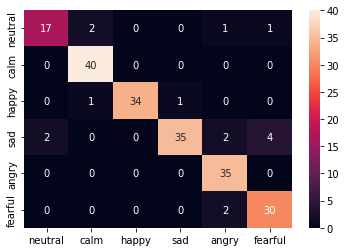

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [25]:
path='/content/drive/My Drive/fusion/fusion_model/KNN/expert2'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
